<a href="https://colab.research.google.com/github/aryankasat/IIT-Gandinagar--Internship/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement from scratch a sampling method to draw samples from a multivariate Normal (MVN) distribution in JAX

In [28]:
import jax
import jax.numpy as jnp
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from jax import random

Set Parameters

In [38]:
# Define dimension. 
d = 10

# Set mean vector. 
m = jnp.array([[2, 1,3,4,5,6,7,8,9,0],
                [1, 2,0,3,4,5,6,7,8,9],
                 [1,3,0,2,4,5,6,7,8,9],
                 [3,1,0,2,4,5,6,7,8,9],
                 [1,4,0,2,3,5,6,7,8,9],
                 [4,1,0,2,3,5,6,7,8,9],
                 [1,5,0,2,3,4,6,7,8,9],
                 [5,1,0,2,3,4,6,7,8,9],
                 [1,6,0,2,3,4,5,7,8,9],
                 [6,1,0,2,3,4,5,7,8,9]]).reshape(10, 10)

# Set covariance function. 
K_0 = jnp.array([[2, 1,3,4,5,6,7,8,9,0],
                [1, 2,0,3,4,5,6,7,8,9],
                 [1,3,0,2,4,5,6,7,8,9],
                 [3,1,0,2,4,5,6,7,8,9],
                 [1,4,0,2,3,5,6,7,8,9],
                 [4,1,0,2,3,5,6,7,8,9],
                 [1,5,0,2,3,4,6,7,8,9],
                 [5,1,0,2,3,4,6,7,8,9],
                 [1,6,0,2,3,4,5,7,8,9],
                 [6,1,0,2,3,4,5,7,8,9]])

Let us compute the eigenvalues of K_0

In [20]:
jnp.linalg.eig(K_0)



[DeviceArray([ 4.5000000e+01+0.j       ,  2.8436220e-01+5.8367624j,
               2.8436220e-01-5.8367624j, -8.8150084e-01+0.9415052j,
              -8.8150084e-01-0.9415052j,  9.7138979e-02+0.6426971j,
               9.7138979e-02-0.6426971j,  2.0613204e-06+0.j       ,
              -9.5589428e-07+0.j       ,  7.0518195e-07+0.j       ],            dtype=complex64),
 DeviceArray([[ 0.31622782+0.j        , -0.6532071 +0.j        ,
               -0.6532071 -0.j        , -0.1055854 +0.1433019j ,
               -0.1055854 -0.1433019j , -0.07035992+0.09482255j,
               -0.07035992-0.09482255j,  0.06220025+0.j        ,
               -0.11470516+0.j        , -0.03450969+0.j        ],
              [ 0.31622773+0.j        ,  0.05171623-0.25280464j,
                0.05171623+0.25280464j, -0.23064578+0.2580684j ,
               -0.23064578-0.2580684j , -0.0552249 +0.17446774j,
               -0.0552249 -0.17446774j,  0.06220007+0.j        ,
               -0.114705  +0.j        , -0.0

Computing the Cholesky Decomposition

In [21]:
# Define epsilon.
epsilon = 0.001

# Add small deviation
K = K_0 + epsilon*jnp.identity(d)

#  Cholesky decomposition.
L = jnp.linalg.cholesky(K)
L

DeviceArray([[nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.],
             [nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.],
             [nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.],
             [nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.],
             [nan, nan, nan, nan, nan, nan, nan, nan,  0.,  0.],
             [nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.],
             [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],            dtype=float32)

Verifying the desired property

In [22]:
jnp.dot(L, jnp.transpose(L))

DeviceArray([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
             [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
             [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
             [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
             [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
             [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
             [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
             [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
             [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
             [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],            dtype=float32)

Generating Independent Samples

In [34]:
# Number of samples. 
n = 10000


key = random.PRNGKey(n)

u = random.uniform(key)

Compute x = m + Lu

In [39]:
x = m + jnp.dot(L, u)

Plot Distribution

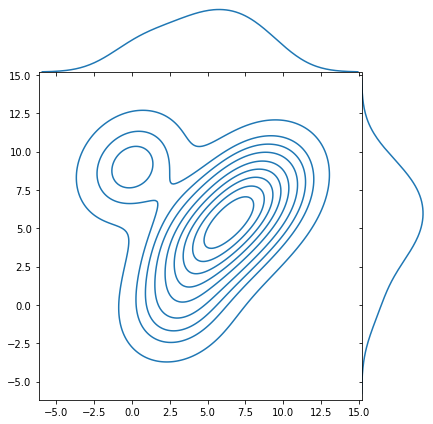

In [40]:
sns.jointplot(x=x[0], y=x[1], kind="kde", space=0);